#Library importing

In [ ]:
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=bc15cbc7e645bb1ad22d8a9985abdefa045e12dd8474262df65eed0bfe80da09
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [ ]:
from google.colab import drive
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn_som.som import SOM
from matplotlib import animation, colors
from pylab import bone, pcolor, colorbar, plot, show

## Importing the data

Defining paths

In [ ]:
drive.mount('/content/drive')
PATH = './drive/MyDrive/Projet_IA/NSL-KDD/'
train_file = 'KDDTrain+.txt'
test_file = 'KDDTest+.txt'

Mounted at /content/drive


Defining the names of the features usinng the metadata

In [ ]:
names = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised', \
         'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count', \
         'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count', \
         'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate', \
         'dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty']

print(len(names))

43


Reading the training and testing data

In [ ]:
training_data = pd.read_csv(PATH+train_file,names=names)
training_data = training_data.iloc[: , :-1]
testing_data = pd.read_csv(PATH+test_file,names=names)
testing_data = testing_data.iloc[: , :-1]

Concatenating the two data files, to split them ourself

In [ ]:
data = pd.concat([training_data,testing_data])

Printing the classes of the data

In [ ]:
print(data.iloc[:,-1])

0         normal
1         normal
2        neptune
3         normal
4         normal
          ...   
22539     normal
22540     normal
22541       back
22542     normal
22543      mscan
Name: class, Length: 148517, dtype: object


# Data visualization

In [ ]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

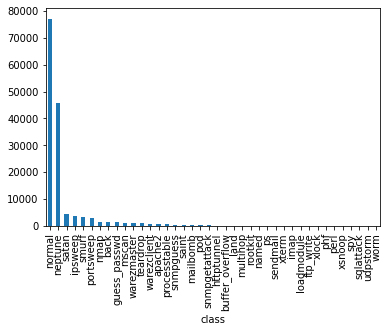

In [ ]:
L = data.groupby('class').size()
L = L.sort_values(ascending=False)
L.plot(kind='bar')

In [ ]:
len(data.groupby('class').size())

40

# Data preprocessing

Changing values in columns that are not numbers

In [ ]:
changing = ['protocol_type','service','flag']
for n in changing:
  L = data[n].value_counts()
  L = L.sort_values(ascending=False)
  data[n] = training_data[n].replace(list(L.index), [i+1 for i in range(len(L))])

Verification that the values have been successfully updated

In [ ]:
data[data.columns[:5]]

,duration,protocol_type,service,flag,src_bytes
0,0,1,5,1,491
1,0,2,6,1,146
2,0,1,2,2,0
3,0,1,1,1,232
4,0,1,1,1,199
...,...,...,...,...,...
22539,0,1,1,1,794
22540,0,1,1,1,317
22541,0,1,49,3,54540
22542,0,2,3,1,42


Verification that the types of the selected columns have been successfully updated

In [ ]:
data.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Grouping all the classes in the 'normal' and 'anomaly' classes

In [ ]:
classes = list(data.groupby('class').size().index)
new_classes = classes.copy()
for i in range(len(new_classes)):
  if new_classes[i] != 'normal':
    new_classes[i] = 'anomaly'

data['class'] = data['class'].replace(classes, new_classes)

Scaling the data

In [ ]:
data = np.array(data.values)
data

array([[0, 1, 5, ..., 0.05, 0.0, 'normal'],
       [0, 2, 6, ..., 0.0, 0.0, 'normal'],
       [0, 1, 2, ..., 0.0, 0.0, 'anomaly'],
       ...,
       [0, 1, 49, ..., 0.07, 0.07, 'anomaly'],
       [0, 2, 3, ..., 0.0, 0.0, 'normal'],
       [0, 1, 2, ..., 0.44, 1.0, 'anomaly']], dtype=object)

Preparing for using a classification via SOM

In [ ]:
scaler = MinMaxScaler()
Data = data[:,:-1].astype(float)
Data = scaler.fit_transform(Data)
Labels = data[:,-1].astype(str)

# Model implementation

The SOM algorithm is used from the minisom library.  
More informations : https://github.com/JustGlowing/minisom

Defining the classify function

In [ ]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

First implementation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data, Labels, stratify=Labels, test_size=0.1)
som = MiniSom(10, 10, 41, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(X_train)
som.train(X_train, 500, verbose=False, random_order=True)

print(classification_report(y_test,classify(som, X_test)))

              precision    recall  f1-score   support

     anomaly       0.95      0.91      0.93      7146
      normal       0.92      0.96      0.94      7706

    accuracy                           0.93     14852
   macro avg       0.94      0.93      0.93     14852
weighted avg       0.93      0.93      0.93     14852



# Optimization

Definition of the hyperparameters

In [ ]:
dimension = [5, 10, 20, 50, 100, 150]
neighbor = ['gaussian', 'mexican_hat', 'bubble', 'triangle']
sigma = [0.1, 0.5, 1, 2, 3, 5]
learning = [0.1, 0.5, 1, 2, 3, 5]

Using a grid search on all the hyperparameters to 

In [ ]:
max_acc = 0
acc_param = []
for dim in dimension:
  for neigh in neighbor:
    for sig in sigma:
      for lear in learning:
        som = MiniSom(dim, dim, 41, sigma=sig, learning_rate=lear, neighborhood_function=neigh)
        acc_param = 2*[i]
        som.pca_weights_init(X_train)
        som.train(X_train, 500, verbose=False, random_order=True)
        acc = accuracy_score(y_test,classify(som, X_test))
        if acc > max_acc:
          max_acc = acc
          acc_param = [dim, neigh, sig, lear]
        
        
print(f"Maximum accuracy is {max_acc} for : \n Dimension = {acc_param[0]} \n Sigma = {acc_param[2]} \n Learning = {acc_param[3]} \n Neighbor = {acc_param[1]}")

/usr/local/lib/python3.8/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.8/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.8/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.8/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.8/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.8/dist-packages/m

KeyboardInterrupt: ignored